# Used Cars Dataset
## Biel Altimira

### 1.Utilitats

In [83]:
# Importem les llibreries que necesitem

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px
import seaborn as sns
import geopandas as gpd


In [2]:
# Carreguem les dades en un dataframe de pandas

fitxer = ("vehicles.csv")
data = pd.read_csv(fitxer)

In [3]:
# Opcions pel display de dataframes

pd.set_option("max_columns", None)

### 2. Neteja de les dades


In [4]:
data.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [5]:
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

<AxesSubplot:>

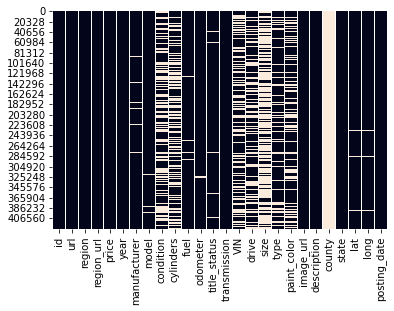

In [6]:
sns.heatmap(data.isnull(), cbar=False)

In [7]:
percent_nan = data.isnull().sum() * 100 / len(data)
nan_df = pd.DataFrame({'columna': data.columns,
                                 'percent_nan': percent_nan})

In [8]:
nan_df.head(30)

,columna,percent_nan
id,id,0.000000
url,url,0.000000
region,region,0.000000
region_url,region_url,0.000000
price,price,0.000000
year,year,0.282281
manufacturer,manufacturer,4.133714
model,model,1.236179
condition,condition,40.785232
cylinders,cylinders,41.622470


In [9]:
# Eliminem les columnes que no utilitzarem

data = data.drop(["county", "url", "region_url", "VIN", "image_url","id"], axis=1)

#### 2.1 Eliminem totes les files amb valors NaN (Variant 1)

In [10]:
# Creem una copia de les dades i borrem totes les files amb valors NaN

variant_1 = data.copy()
variant_1.drop("size", axis=1)
variant_1.dropna(axis = 0, inplace=True)

In [11]:
variant_1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [12]:
variant_1.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [13]:
variant_1.shape

(79016, 20)

#### 2.2 Insertem modes i mitjanes (Variant 2)

In [14]:
# Copiem el dataframe

variant_2 = data.copy()

In [15]:
# Creem un datafram amb totes les columnes que contenen un valor NaN

nulls = variant_2[variant_2.isnull().any(axis=1)]
nulls.head(2000)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,gadsden-anniston,2990,1996.0,nissan,pickup,NaN,NaN,gas,233000.0,clean,manual,NaN,NaN,NaN,NaN,"Great work truck, 4cyl, 5 spd, manual, runs an...",al,33.713828,-85.845171,2021-04-16T11:18:24-0500
2438,gadsden-anniston,4600,2002.0,toyota,rav4,NaN,NaN,gas,195000.0,clean,automatic,NaN,NaN,NaN,NaN,"Great SUV, runs and drive very good, clean in ...",al,33.713897,-85.845280,2021-04-16T11:00:00-0500
2440,gadsden-anniston,23990,2019.0,mitsubishi,outlander gt sport,good,6 cylinders,gas,20657.0,clean,other,4wd,NaN,SUV,brown,Carvana is the safer way to buy a car During t...,al,34.010000,-86.010000,2021-04-15T12:31:05-0500
2441,gadsden-anniston,0,2018.0,acura,tlx,excellent,4 cylinders,gas,33916.0,clean,automatic,fwd,NaN,sedan,black,2018 Acura TLX by Benton Nissan of Oxford St...,al,33.614088,-85.796729,2021-04-15T11:01:22-0500


In [16]:
# Insertem modes i mitjanes

In [17]:
variant_2["condition"].fillna(variant_2["condition"].mode()[0], inplace=True)

In [18]:
variant_2["cylinders"].fillna(variant_2["cylinders"].mode()[0], inplace=True)

In [19]:
variant_2["drive"].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [20]:
variant_2["drive"].fillna(variant_2["drive"].mode()[0], inplace=True)

In [21]:
variant_2["size"].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [22]:
variant_2["size"].fillna(variant_2["size"].mode()[0], inplace=True)

In [23]:
variant_2["type"].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [24]:
variant_2["type"].fillna(variant_2["type"].mode()[0], inplace=True)

In [25]:
variant_2["paint_color"].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [26]:
variant_2["paint_color"].fillna(variant_2["paint_color"].mode()[0], inplace=True)

In [27]:
#Eliminem les poques files restants

variant_2.dropna(axis = 0, inplace=True)

In [28]:
variant_2.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [29]:
variant_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383487 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383487 non-null  object 
 1   price         383487 non-null  int64  
 2   year          383487 non-null  float64
 3   manufacturer  383487 non-null  object 
 4   model         383487 non-null  object 
 5   condition     383487 non-null  object 
 6   cylinders     383487 non-null  object 
 7   fuel          383487 non-null  object 
 8   odometer      383487 non-null  float64
 9   title_status  383487 non-null  object 
 10  transmission  383487 non-null  object 
 11  drive         383487 non-null  object 
 12  size          383487 non-null  object 
 13  type          383487 non-null  object 
 14  paint_color   383487 non-null  object 
 15  description   383487 non-null  object 
 16  state         383487 non-null  object 
 17  lat           383487 non-null  float64
 18  lon

In [30]:
variant_2.shape

(383487, 20)

### 3. Exploratory Data Analysis (Exploració de les dades)

In [31]:
variant_2.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [32]:
variant_2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,full-size,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [33]:
variant_1["cylinders"] = variant_1["cylinders"].apply(lambda x : x.split(" ")[0])
variant_2["cylinders"] = variant_2["cylinders"].apply(lambda x : x.split(" ")[0])

<AxesSubplot:>

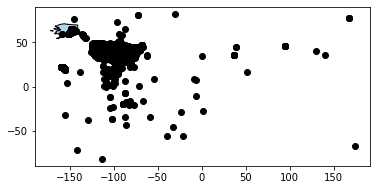

In [34]:
df_geo = gpd.GeoDataFrame(variant_2, geometry = gpd.points_from_xy(variant_2.long, variant_2.lat))
paisos = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
axis = paisos[paisos.name == "United States of America"].plot(color = "lightblue", edgecolor = "black")
df_geo.plot(ax = axis, color = "black")

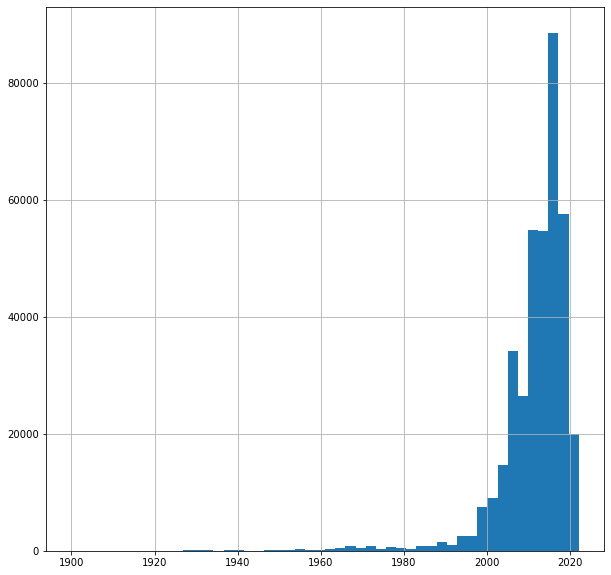

In [85]:
variant_2.year.hist(bins=50, figsize=(10,10))
plt.show()


In [77]:
def pie_plot(df, columna):
    valors = pd.DataFrame(pd.value_counts(getattr(df, columna)))
    figura = px.pie(valors, values=columna, names = valors.index, title=columna)
    figura.show()

In [89]:
llista_pie = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive","paint_color", "type", "size"]

for columna in llista_pie:
    pie_plot(variant_2, columna)